## Practice dataset: Airlines Arrival

Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

Primary question: 
- Outcome of interest: Whether an arriving flight will be on time or delayed. 


Secondary outcomes: 
- When is a good time to fly or when flights are least delayed? 
- List of  airlines that are more prone to the delay? 
- What are the primary factors that cause/ related to the delay? 

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import sklearn models 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn import linear_model
from sklearn.metrics import confusion_matrix


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
df = pd.read_csv('2008.csv')

In [4]:
df.shape # 7 mln datapoints, 29 variables including the outcome variable
#random sampling to 25% for computational efficiency

(7009728, 29)

In [5]:
sample = df.sample(frac=0.25, replace=True, random_state=111)

In [5]:
sample.shape  # 1.75 mln datapoints, 29 variables

(1752432, 29)

In [6]:
sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3616596,2008,7,6,7,649.0,655,807.0,815,WN,468,...,8.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6945644,2008,12,7,7,834.0,835,1403.0,1430,AS,20,...,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4728788,2008,8,4,1,1954.0,1715,129.0,2250,AA,794,...,8.0,25.0,0,NaN,0,0.0,0.0,2.0,0.0,157.0
4330196,2008,8,18,1,1326.0,1335,1427.0,1442,XE,430,...,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2199638,2008,4,24,4,2017.0,1910,2209.0,2055,MQ,4502,...,5.0,22.0,0,NaN,0,36.0,0.0,7.0,0.0,31.0


In [7]:
sample.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1752432.0,1.752432e+06,1.752432e+06,1.752432e+06,1.718472e+06,1.752432e+06,1.714614e+06,1.752432e+06,1.752432e+06,1.713870e+06,...,1.752432e+06,1.714614e+06,1.718263e+06,1.752432e+06,1.752432e+06,380791.000000,380791.000000,380791.000000,380791.000000,380791.000000
mean,2008.0,6.377964e+00,1.573477e+01,3.924709e+00,1.333708e+03,1.326068e+03,1.481187e+03,1.494558e+03,2.224662e+03,1.272535e+02,...,7.258026e+02,6.859805e+00,1.644132e+01,1.955568e-02,2.449168e-03,15.834156,3.048412,17.235055,0.071422,20.729319
std,0.0,3.407132e+00,8.795838e+00,1.989233e+00,4.781821e+02,4.642054e+02,5.050018e+02,4.824917e+02,1.961511e+03,7.014678e+01,...,5.616410e+02,4.930965e+00,1.133278e+01,1.384676e-01,4.942844e-02,39.950477,19.148238,32.173666,1.887592,39.117848
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.090000e+02,...,5.800000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.906000e+03,3.518000e+03,1.570000e+02,...,9.510000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,1.379000e+03,...,4.962000e+03,2.330000e+02,4.290000e+02,1.000000e+00,1.000000e+00,1552.000000,1148.000000,1357.000000,392.000000,925.000000


In [8]:
sample.columns #'ArrDelay' is the variable of interest, value in minutes

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [9]:
sample.ArrDelay.describe()

count    1.713870e+06
mean     8.169415e+00
std      3.843001e+01
min     -8.700000e+01
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      1.583000e+03
Name: ArrDelay, dtype: float64

In [10]:
# sns.distplot(sample.ArrDelay) # null values 

# All flights that are cancelled or diverted have null values 
sample.groupby(['Cancelled', 'Diverted'])['ArrDelay'].describe()


count      mean        std   min   25%  50%   75%  \
Cancelled Diverted                                                          
0         0         1713870.0  8.169415  38.430009 -87.0 -10.0 -2.0  12.0   
          1               0.0       NaN        NaN   NaN   NaN  NaN   NaN   
1         0               0.0       NaN        NaN   NaN   NaN  NaN   NaN   

                       max  
Cancelled Diverted          
0         0         1583.0  
          1            NaN  
1         0            NaN

In [11]:
sample.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# Dropping rows of 'Cancelled' and 'Diverted' flights
sample = sample[(sample.Cancelled==0) & (sample.Diverted==0)]

In [7]:
sample.ArrDelay.isnull().sum()  # now no null values for Arrival Delay

sample.isnull().sum() # this also removes other null values 

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     1713870
Diverted                   0
CarrierDelay         1333079
WeatherDelay         1333079
NASDelay             1333079
SecurityDelay        1333079
LateAircraftDelay    1333079
dtype: int64

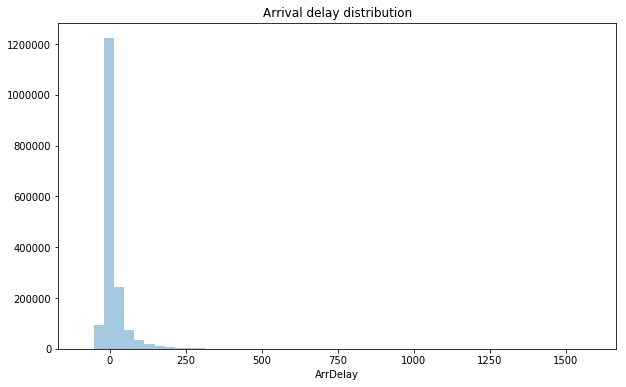

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(sample.ArrDelay, bins=50, kde=False)
plt.title('Arrival delay distribution')
plt.show()

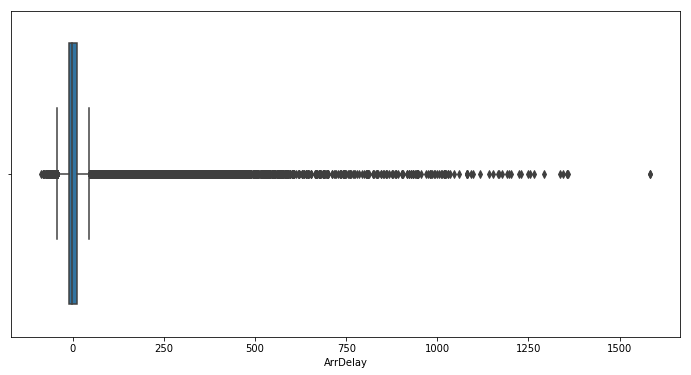

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(sample.ArrDelay)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


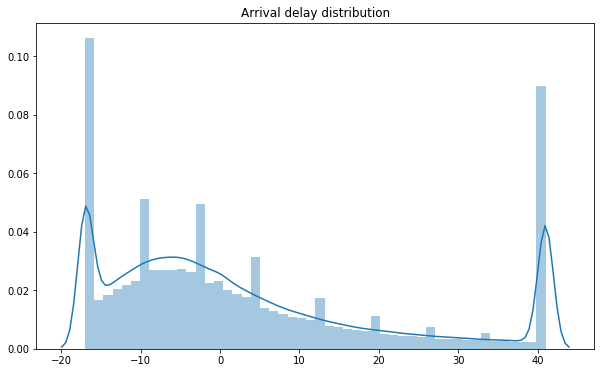

In [39]:
# Another attempt after winsorizing

from scipy.stats.mstats import winsorize
arr_win = winsorize(sample.ArrDelay.values, limits=(0.1))
plt.figure(figsize=(10,6))
sns.distplot(arr_win)
plt.title('Arrival delay distribution')
plt.show()

### Exploratory Data visualization

Let's take a look at how arrival delay is related to other variables. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


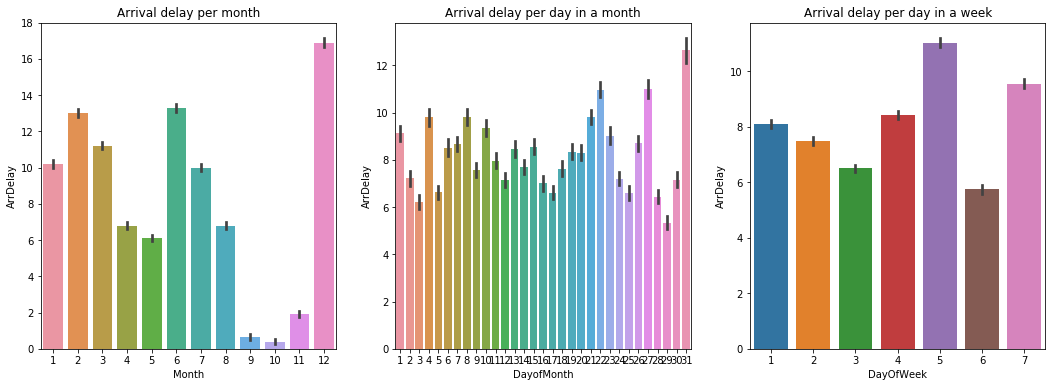

In [15]:
# Arrival delay and time

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.barplot(data=sample, x='Month', y='ArrDelay')
plt.title('Arrival delay per month')

plt.subplot(1,3,2)
sns.barplot(data=sample, x='DayofMonth', y='ArrDelay')
plt.title('Arrival delay per day in a month')


plt.subplot(1,3,3)
sns.barplot(data=sample, x='DayOfWeek', y='ArrDelay')
plt.title('Arrival delay per day in a week')
plt.show()


- Flights in December are delayed the most, while flights in September, October and November are generally not delayed. 

- Day of the month is not a significant indicator of arrival delay. 

- Flights arriving on Friday are also delayed more than other days. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


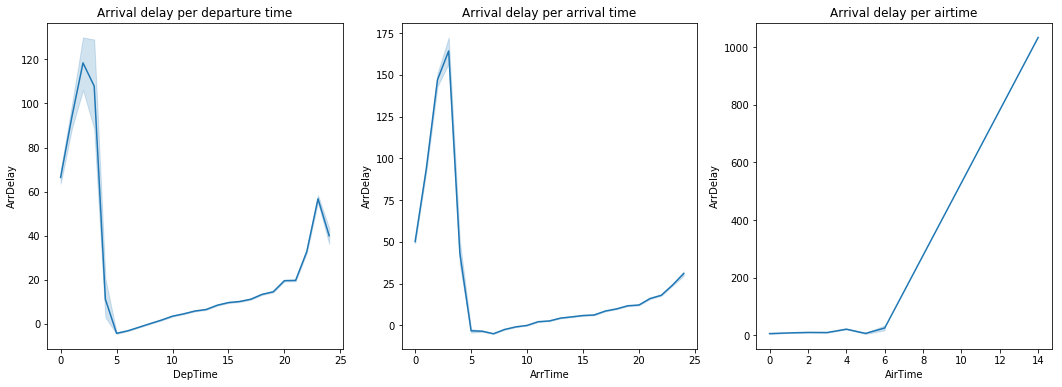

In [16]:
# Arrival delay and time

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.lineplot(x=round(sample.DepTime/100, 0), y=sample.ArrDelay, markers=True)
plt.title('Arrival delay per departure time')

plt.subplot(1,3,2)
sns.lineplot(x=round(sample.ArrTime /100, 0), y=sample.ArrDelay, markers=True)
plt.title('Arrival delay per arrival time')


plt.subplot(1,3,3)
sns.lineplot(x=round(sample.AirTime/100, 0), y=sample.ArrDelay, markers=True)
plt.title('Arrival delay per airtime')
plt.show()


- Flights departing and arriving between midnight and 5 am are delayed the most. 

- Flights longer than 6 hours of airtime also arrived delayed. The longer the airtime, longer is the propensity of delay. 

In [17]:
sample.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
delay_variables = sample[['ArrDelay','DepDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

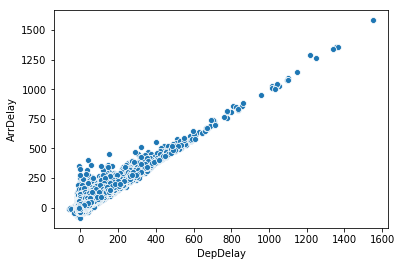

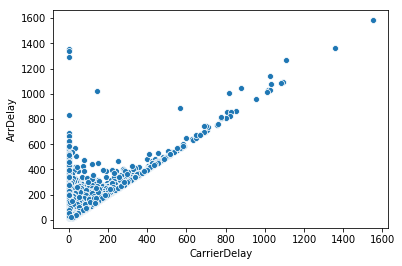

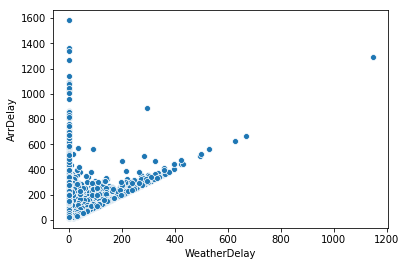

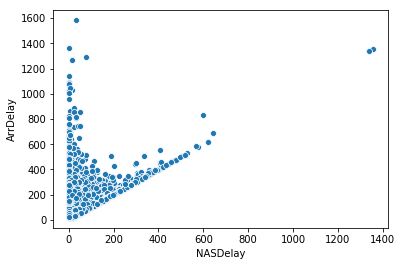

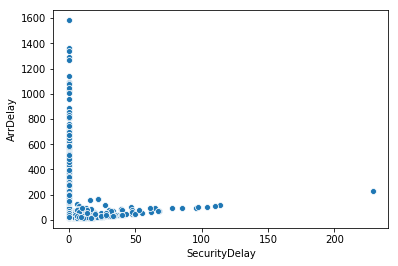

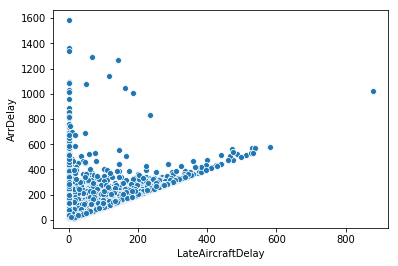

In [11]:
for col in delay_variables.columns[1:]:
 #   print(col)
    sns.scatterplot(data=delay_variables, y='ArrDelay', x=col)
    plt.show()
    
# DepDelay, CarrierDelay and LateAircraftDelay seems to have linear relations with ArrDelay

In [12]:
# Reassigning delay_Variables

delay_variables = sample[['ArrDelay','DepDelay', 'CarrierDelay','LateAircraftDelay']]

In [16]:
delay_variables.isna().sum()

ArrDelay                  0
DepDelay                  0
CarrierDelay         266703
LateAircraftDelay    266703
dtype: int64

In [15]:
delay_variablesq = delay_variables.fillna(delay_variables.mean())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


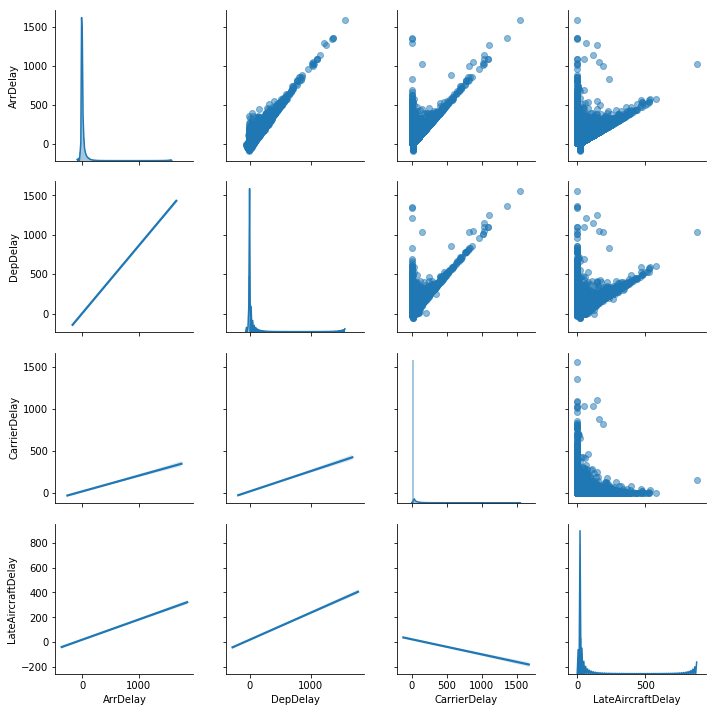

In [20]:
#plt.figure(figsize=(12,8))

#Declare scatterplot matrix
g = sns.PairGrid(delay_variablesq, diag_sharey=False)

#Set upper matrix to scatter
g.map_upper(plt.scatter, alpha=.5)

#Set lower matrix to regression lines
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

#Set diagonals to distribution plot
g.map_diag(sns.distplot)
plt.show()

In [16]:
# Selecting a subset with arrival delay wrt carrier, origin and destination
sample_1 = sample[['ArrDelay', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest']]

# Selecting only positive delays, not early arrivals (in negative values)
sample_1 = sample_1[sample_1.ArrDelay >= 0]

In [17]:
sample_1.head(20)

,ArrDelay,UniqueCarrier,FlightNum,TailNum,Origin,Dest
4728788,159.0,AA,794,N4WPAA,LAS,ORD
2199638,74.0,MQ,4502,N626AE,ORD,AZO
1732726,51.0,B6,87,N651JB,JFK,SLC
3905490,51.0,US,1712,N713UW,FLL,DCA
168903,20.0,OH,5360,N786CA,ORD,JFK
601354,4.0,DL,1646,N900DE,SAT,ATL
5736304,3.0,HA,182,N480HA,HNL,ITO
2053390,28.0,US,1528,N514AU,SAV,CLT
2637366,1.0,UA,1220,N536UA,SJC,DEN
4786888,6.0,B6,94,N566JB,OAK,JFK


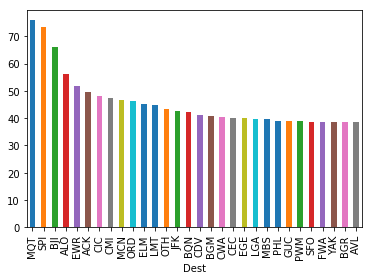

In [22]:
sample_1.groupby(['Dest'])['ArrDelay'].mean().sort_values(ascending=False).head(30).plot(kind='bar')

In [8]:
sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3616596,2008,7,6,7,649.0,655,807.0,815,WN,468,...,8.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6945644,2008,12,7,7,834.0,835,1403.0,1430,AS,20,...,6.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4728788,2008,8,4,1,1954.0,1715,129.0,2250,AA,794,...,8.0,25.0,0,NaN,0,0.0,0.0,2.0,0.0,157.0
4330196,2008,8,18,1,1326.0,1335,1427.0,1442,XE,430,...,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2199638,2008,4,24,4,2017.0,1910,2209.0,2055,MQ,4502,...,5.0,22.0,0,NaN,0,36.0,0.0,7.0,0.0,31.0


In [12]:
sample.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
# select a subset of columns 

sample = sample.drop(['Year', 'Cancelled', 'CancellationCode', 'Diverted'], 
                    axis=1)

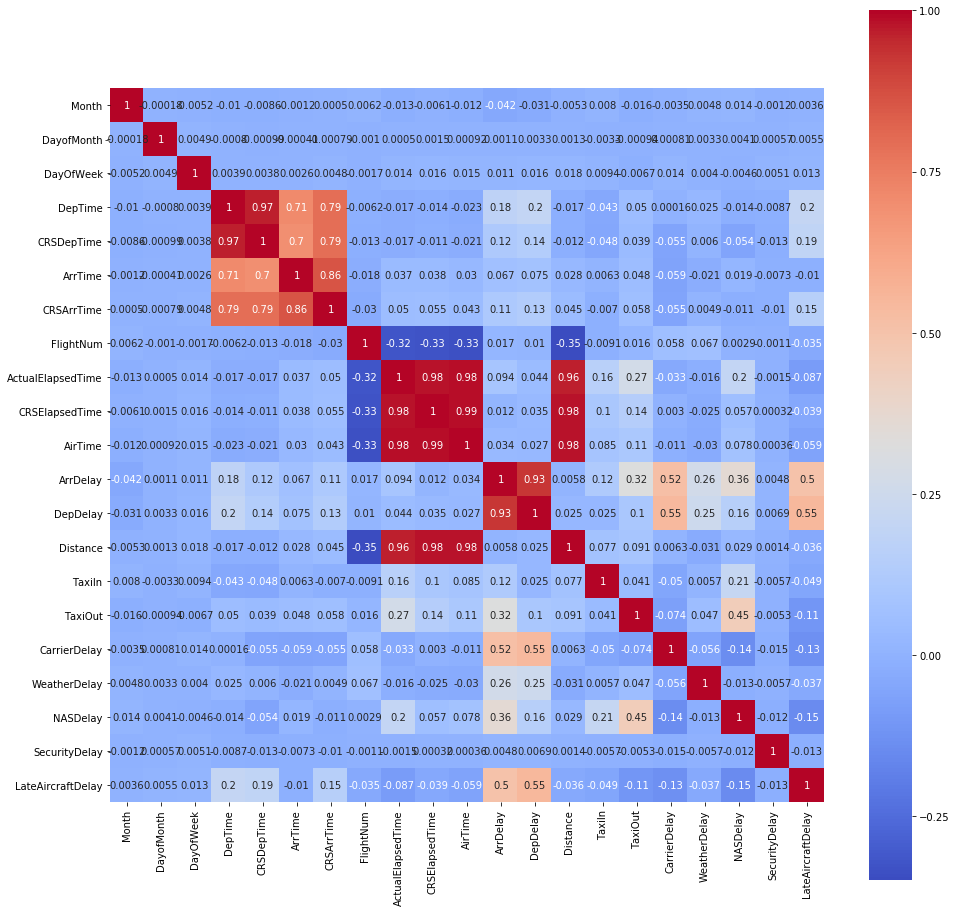

In [15]:
# Let's look at the correlations among the variables

plt.figure(figsize=(16,16))
sns.heatmap(sample.corr(), cmap='coolwarm', square=True, annot=True, 
            linecolor='red')

In [23]:
# creating the y variable for classification. 

sample['y'] = np.where(sample['ArrDelay']>=30, 1, 0)

In [26]:
# Creating X and y

X = sample.drop('y', axis=1)
y = sample.y

In [28]:
# train test split 
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=101)

In [32]:
X_tr.shape
y_tr.shape
X_ts.shape
y_ts.shape

(514161,)

In [43]:
# Class imbalance

print('values of y: \n', y_tr.value_counts())
print('% of late arrival: ',len(y_tr[y_tr==1])/len(y_tr))

values of y: 
 0    1037734
1     161975
Name: y, dtype: int64
% of late arrival:  0.1350119070541273


In [46]:
# Trying Random Forest 

rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_tr, y_tr)

ValueError: could not convert string to float: 'PHL'

In [ ]:
y_pred = rfc

-DepTime, ArrTime – actual departure and arrival time
-CRSDepTime, CRSArrTime – scheduled arrival and departure time (CRS is the Computer Reservation System)
-DepDelay, ArrDelay – the departure and arrival delays based on scheduled arrival and departure times
-Cancelled – a binary variable on whether a flight was cancelled (0 = no, 1 = yes)

In [ ]:
sample[['DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut' ]].head(10)  # DepTime - CRSDepTime = DepDelay

In [ ]:
(sample.DepTime - sample.CRSDepTime == sample.DepDelay).value_counts()

In [ ]:
(sample.ArrTime - sample.CRSArrTime == sample.ArrDelay).value_counts()

In [ ]:
sns.scatterplot(data=sample, x='DepTime', y='CRSDepTime')

In [ ]:
sns.scatterplot(data=sample, x='DepTime', y='DepDelay')

In [ ]:
sns.scatterplot(data=sample,  x='DepDelay', y='Distance')

In [ ]:
sns.barplot(data=sample, x='Month', y='DepDelay')

In [ ]:
sns.barplot(data=sample, x='DayofMonth', y='DepDelay')

In [ ]:
sns.barplot(data=sample, x='DayOfWeek', y='DepDelay')

In [ ]:
sns.distplot(sample.dropna().corr())